# Jan Walkiewicz - Projekt ryzyko kredytowe - Atlas

In [23]:
# Biblioteki
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from plotnine import ggplot, aes, geom_violin, geom_boxplot, labs, ggtitle, theme, element_text, theme_bw, geom_density, scale_fill_manual, geom_point, geom_smooth, geom_col
import warnings
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from scipy.stats import chi2_contingency
import pandas as pd
import scipy.stats as stats
import pandas as pd
from scipy import stats
import pandas as pd
from scipy import stats

# Spis treści
1. [Przygotowanie danych](#1.-Przygotowanie-danych)
2. [Eksploracyjna analiza danych](#2.-Eksploracyjna-analiza-danych)
3. [Zależności między zmiennymi](#3.-Zaleznosci-miedzy-zmiennymi)
4. [Uzupełnianie danych](#4.-Uzupelnianie-danych)
5. [Tworzenie i trenowanie modeli](#5.-Tworzenie-i-trenowanie-modeli)
6. [Sprawdzanie jakości modeli](#6.-Sprawdzanie-jakosci-modeli)


# 1. Przygotowanie danych

## Sprzątamy dane

### Sprawdźmy pierw ilość, oraz typ naszych danych 

In [24]:
#Importowanie danych
data = pd.read_csv(r"c:\Users\admin\Desktop\studia\ATLAS\data_atlas.csv")

## Zajmijmy się każdą kolumną z osobna

### 1. Kolumna id

#### Nie będzie nam potrzebna podczas naszej analizy, usuwamy ją.

In [25]:
#Usunięcie
data.drop(data.columns[0], axis=1, inplace=True)

### 2. Kolumna income

#### W kolumnie income lepiej sprawdzi się typ float, zmieńmy więc typ

In [26]:
# Przekształcenie danych na stringi (przygotowanie do manipulacji tekstu)
data['income'] = data['income'].astype(str)

# Usunięcie "złotówki"
data['income'] = data['income'].str.replace('złoty', '', regex=False)
data['income'] = data['income'].str.replace('oty', '', regex=False)

# Usunięcie zbędnych spacji
data['income'] = data['income'].str.strip()

# Konwersja na typ float
data['income'] = pd.to_numeric(data['income'], errors='coerce')

### 3. Kolumna children

#### Zmieńmy także kolumne children na int

In [27]:
# 1. Przekształcenie danych na stringi (przygotowanie do manipulacji tekstu)
data['children'] = data['children'].astype(str)

# 2. Usunięcie "złotówki"
data['children'] = data['children'].str.replace('dzieci', '', regex=False)
data['children'] = data['children'].str.replace('brak', '0', regex=False)

# 3. Usunięcie zbędnych spacji
data['children'] = data['children'].str.strip()

# 4. Konwersja na typ float
data['children'] = pd.to_numeric(data['children'], errors='coerce')

### 4. Kolumna credit_history

In [28]:
data['credit_history'].unique()

array(['dobra historia', 'brak historii', nan], dtype=object)

#### Możemy zauważyć, że wystepują tylko 2 typy wartości: "dobra historia" i "brak historii", zmieńmy, więc te wartości na wartości binarne.
TRUE - dobra historia

FALSE - brak historii

In [29]:
# 1. Przekształcenie danych na stringi (przygotowanie do manipulacji tekstu)
data['credit_history'] = data['credit_history'].astype(str)

# 2. Zmiana wartości (tylko na znanych danych)
data['credit_history'] = data['credit_history'].where(
    data['credit_history'].notna(), np.nan
)
data['credit_history'] = data['credit_history'].str.replace('dobra historia', 'TRUE', regex=False)
data['credit_history'] = data['credit_history'].str.replace('brak historii', 'FALSE', regex=False)

# 3. Usunięcie zbędnych spacji
data['credit_history'] = data['credit_history'].str.strip()

# Zmiana na typ bool, zachowując NaN
data['credit_history'] = data['credit_history'].map({'TRUE': True, 'FALSE': False})

### 5. Kolumna overdue_payments

In [30]:
data['overdue_payments'].unique()

array(['brak opóźnień', nan, 'opóźnienia', '3', '2', '4'], dtype=object)

#### Możemy zobaczyć źle wpisane wartości: 3, 2 i 4. Są źle wpisane, więc musimy je usunąć.

In [31]:
#Usunięcie źle wpisanych danych
data['overdue_payments'] = data['overdue_payments'].replace(["3", "4", "2"], np.nan)


In [32]:
data['overdue_payments'].unique()

array(['brak opóźnień', nan, 'opóźnienia'], dtype=object)

#### Teraz możemy zobaczyć, że wsytępują tylko 2 wartości, zamieńmy je więc na wartości binarne.
TRUE - opóźnienia

FALSE - brak opóźnień

In [33]:
# 1. Przekształcenie danych na stringi (przygotowanie do manipulacji tekstu)
data['overdue_payments'] = data['overdue_payments'].astype(str)

# 2. Zmiana wartości (tylko na znanych danych)
data['overdue_payments'] = data['overdue_payments'].where(
    data['overdue_payments'].notna(), np.nan
)
data['overdue_payments'] = data['overdue_payments'].str.replace('brak opóźnień', 'False', regex=False)
data['overdue_payments'] = data['overdue_payments'].str.replace('opóźnienia', 'True', regex=False)

# 3. Usunięcie zbędnych spacji
data['overdue_payments'] = data['overdue_payments'].str.strip()

# 4. Zmiana na typ bool, zachowując NaN
data['overdue_payments'] = data['overdue_payments'].where(
    data['overdue_payments'] != 'nan', np.nan
).map({'True': True, 'False': False})



### 6. Kolumna active_loans

#### Wszystko jest z nią w porządku :)

### 7. Kolumna years_in_job

#### Również wszystko okej :)

### 8. Kolumna employment_type

In [34]:
data['employment_type'].unique()

array(['samozatrudnienie', 'stała', 'brak', 'określona'], dtype=object)

#### W tej kolumnie użyjemy kodowania one-hot enconding

In [35]:
# Kodowanie zmiennych kategorycznych
data = pd.get_dummies(data, columns = ['employment_type'])

### 9. Kolumna owns_property

In [36]:
data['owns_property'].unique()

array([nan, 'tak', 'nie'], dtype=object)

#### Wsystępują, tylko wartości "tak" i "nie", zamieńmy je na wartości binarne "TRUE" i "FALSE".
tak - TRUE

nie - FALSE

In [37]:
# 1. Przekształcenie danych na stringi (przygotowanie do manipulacji tekstu)
data['owns_property'] = data['owns_property'].astype(str)

# 2. Zmiana wartości (tylko na znanych danych)
data['owns_property'] = data['owns_property'].where(
    data['owns_property'].notna(), np.nan
)
data['owns_property'] = data['owns_property'].str.replace('tak', 'TRUE', regex=False)
data['owns_property'] = data['owns_property'].str.replace('nie', 'FALSE', regex=False)

# 3. Usunięcie zbędnych spacji
data['owns_property'] = data['owns_property'].str.strip()

# 4. Zmiana na typ bool, zachowując NaN
data['owns_property'] = data['owns_property'].where(
    data['owns_property'] != 'nan', np.nan
).map({'TRUE': True, 'FALSE': False})

### 10. Kolumna assets_value

#### Lepiej spradzi się typ float, zmieńmy więc typ na float.

In [38]:
# Przekształcenie danych na stringi (przygotowanie do manipulacji tekstu)
data['assets_value'] = data['assets_value'].astype(str)

# Usunięcie "złotówki"
data['assets_value'] = data['assets_value'].str.replace('złoty', '', regex=False)
data['assets_value'] = data['assets_value'].str.replace('oty', '', regex=False)

# Usunięcie zbędnych spacji
data['assets_value'] = data['assets_value'].str.strip()

# Konwersja na typ float
data['assets_value'] = pd.to_numeric(data['assets_value'], errors='coerce')

### 11. Kolumna other_loans

#### Wszystko z nią w porządku :)

### 12. Kolumna education

In [39]:
data['education'].unique()

array(['wyższe', 'średnie', 'podstawowe'], dtype=object)

#### Jako, że mamy tylko 3 rodzaje wykształcenia i wiemy, że wykształcenie średnie jest lepsze od podstawowego, oraz wyższe jest lepsze od średniego oznaczmy je za pomocą liczb w następujący sposób:
0 - podstawowe

1 - średnie

2 - wyższe

In [40]:
# 1. Przekształcenie danych na stringi (przygotowanie do manipulacji tekstu)
data['education'] = data['education'].astype(str)

# 2, Zmiana wartości
data['education'] = data['education'].str.replace('podstawowe', '0', regex=False)
data['education'] = data['education'].str.replace('średnie', '1', regex=False)
data['education'] = data['education'].str.replace('wyższe', '2', regex=False)

# 3. Usunięcie zbędnych spacji
data['education'] = data['education'].str.strip()

# 4. Konwersja na typ int
data['education'] = pd.to_numeric(data['education'], errors='coerce')

### 13. Kolumna city

In [41]:
data['city'].unique()

array(['małe', 'średnie', 'duże'], dtype=object)

#### W tej kolumnie też mamy tylko 3 rodzaje miast, jednak nie możemy stweirdzić, że na przykład średnie miasta są lepsze od dużych. Skorzystamy więc z kodowania one-hot encodning.

In [42]:
# Kodowanie zmiennych kategorycznych
data = pd.get_dummies(data, columns = ['city'])

###  14. Kolumna marital_status

In [43]:
data['marital_status'].unique()

array(['żonaty/zamężna', 'kawaler/panna', 'rozwiedziony/rozwiedziona'],
      dtype=object)

#### Sytuacja wygląda tak samo jak we wcześniejszej kolumnie, postępujemy dokładnie tak samo.

In [44]:
# Kodowanie zmiennych kategorycznych
data = pd.get_dummies(data, columns = ['marital_status'])

### 15. Kolumna support_indicator

#### Jest nam niepotrzebna, usuwamy ją.

In [45]:
# Usuwanie
data.drop(data.columns[11], axis=1, inplace=True)

Dane po zmianach wyglądają następująco:

In [46]:
# Sprawdzenie
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   age                                       10000 non-null  int64  
 1   income                                    8000 non-null   float64
 2   children                                  10000 non-null  int64  
 3   credit_history                            8000 non-null   object 
 4   overdue_payments                          7260 non-null   object 
 5   active_loans                              10000 non-null  int64  
 6   years_in_job                              10000 non-null  int64  
 7   owns_property                             8000 non-null   object 
 8   assets_value                              8000 non-null   float64
 9   other_loans                               10000 non-null  int64  
 10  education                          

In [47]:
#Importowanie danych
data_basic = pd.read_csv(r'C:\Users\admin\Desktop\studia\ATLAS\data_atlas.csv')



provisional_data_basic = data_basic.copy()
provisional_data_basic['credit_risk'] = provisional_data_basic['credit_risk'].replace({
    '0': 'małe ryzyko',
    '1': 'duże ryzyko'
})

data_numeric = data.drop(['credit_history', 'overdue_payments', 'employment_type_brak', 'employment_type_samozatrudnienie','employment_type_stała', 'employment_type_określona', 'owns_property', 'education', 'city_duże', 'city_małe', 'city_średnie', 'marital_status_rozwiedziony/rozwiedziona', 'marital_status_żonaty/zamężna', 'marital_status_kawaler/panna', 'credit_risk'], axis=1)
data_basic_category = data_basic.drop(['age', 'income', 'children', 'active_loans', 'years_in_job', 'assets_value', 'other_loans'], axis=1)
data_basic_category = data_basic_category.iloc[:, 1:-2]
data_basic_category = data_basic_category.astype('object')# Zmiana wszystkich kolumn na typ object


# 2. Eksploracyjna analiza danych

### Rozkład zmiennych w zależności od ryzyka kredytowego

#### Ryzyko kredytowe

Pierwsze co należałoby zrobić to sprawdzić jak często dane ryzyka kredytowe występują.

Czy są one równomiernie rozłożone? A może któreś znacznie przeważa? Sprawdźmy to.

In [48]:
#Rozłożenie ryzyka kredytowego
data['credit_risk'].value_counts()

credit_risk
0    9675
1     325
Name: count, dtype: int64

Jak widać zdecydowana większość obserwacji w naszym zbiorze ma niskie ryzyko kredytowe, będziemy musieli to uwzględnić w niektórych wykresach.

Jest to mniej niz 3,5% naszych obserwacji

Przeprowadźmy dalszą analize aby lepiej zrozumieć rozkład ryzyk kredytowych.

#### Zmienne liczbowe

##### Pierwszą zmienną jaka przychodzi do głowy jeśli chodzi o ryzyko kredytowe są zarobki, sprawdźmy jak wygląda rozkład tej zmiennej.

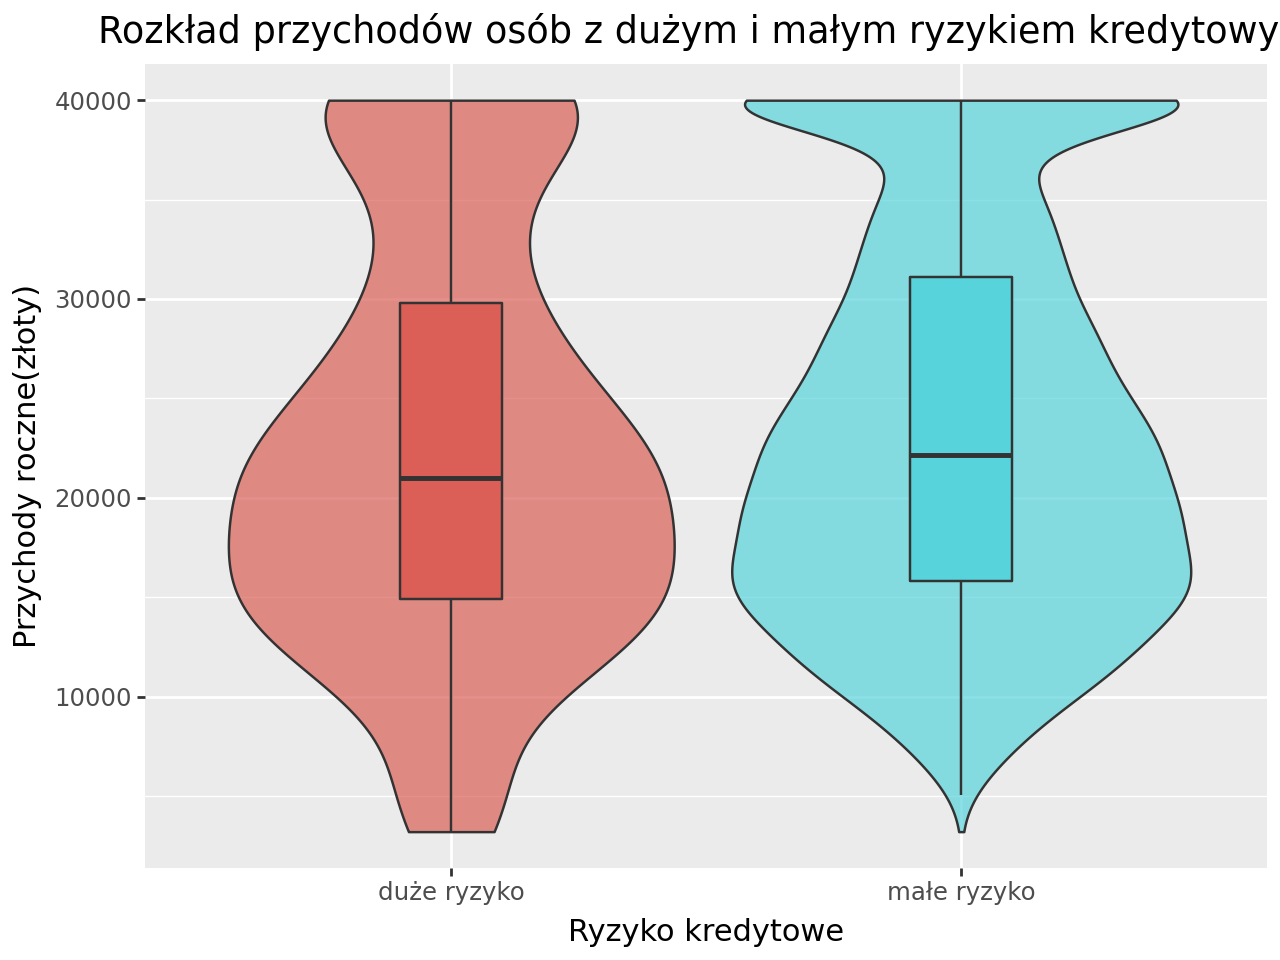

In [49]:
#Tworzenie i wyświetlanie wykresów
warnings.filterwarnings('ignore') #Nie pokazujmy ostrzeżeń

provisional_data = data.copy()
provisional_data['credit_risk'] = provisional_data['credit_risk'].replace({0: 'małe ryzyko', 1: 'duże ryzyko'})
plot = (
    ggplot(provisional_data, aes(x='factor(credit_risk)', y='income', fill='factor(credit_risk)')) +
    geom_violin(trim=False, alpha=0.7) +  # Violin plot
    geom_boxplot(width=0.2, outlier_alpha=0) +  # Boxplot
    labs(
        y="Przychody roczne(złoty)",
        x="Ryzyko kredytowe", 
    ) +
    ggtitle("Rozkład przychodów osób z dużym i małym ryzykiem kredytowym") + 
    theme(
        plot_title=element_text(hjust=0.5), #Tytuł na środku
        legend_position="none", 
    ) 
)

plot

Wnioski płynące z wykresu są dosyć niespodziewane, gdyż zarobki osób z dużym ryzykiem kredytowym nie różnią się znacząco od tych z małym. Mediana również znacząco się nie różni.

Duże różnice widać jedynie na dole wykresu, przy zarobkach rocznych między 4, a około 8 tysięcy gdzie zauważono przewagę osób z dużym ryzykiem kredytowym. Oraz na przedziale przychodów około 37,5 tysiąca do 40 tysięcy jest zauważalna zdecydowana przewaga osób z małym ryzykiem.

Jak, więc możemy zauważyć jeśli zarobki oscylują między około 8 tysięcy, a 37,5 tysiąca (nie są wartością skrajną) nie ma to większego wpływu na ryzyko kredytowe.

Na wykresie widać także, że najwięcej osób w naszym zbiorze zarabia miedzy 15 tysięcy, a 20 tysięcy złotcyh rocznie.

##### A jak wygląda rozkład grup ryzyka kredytowego jeśli chodzi o wiek?

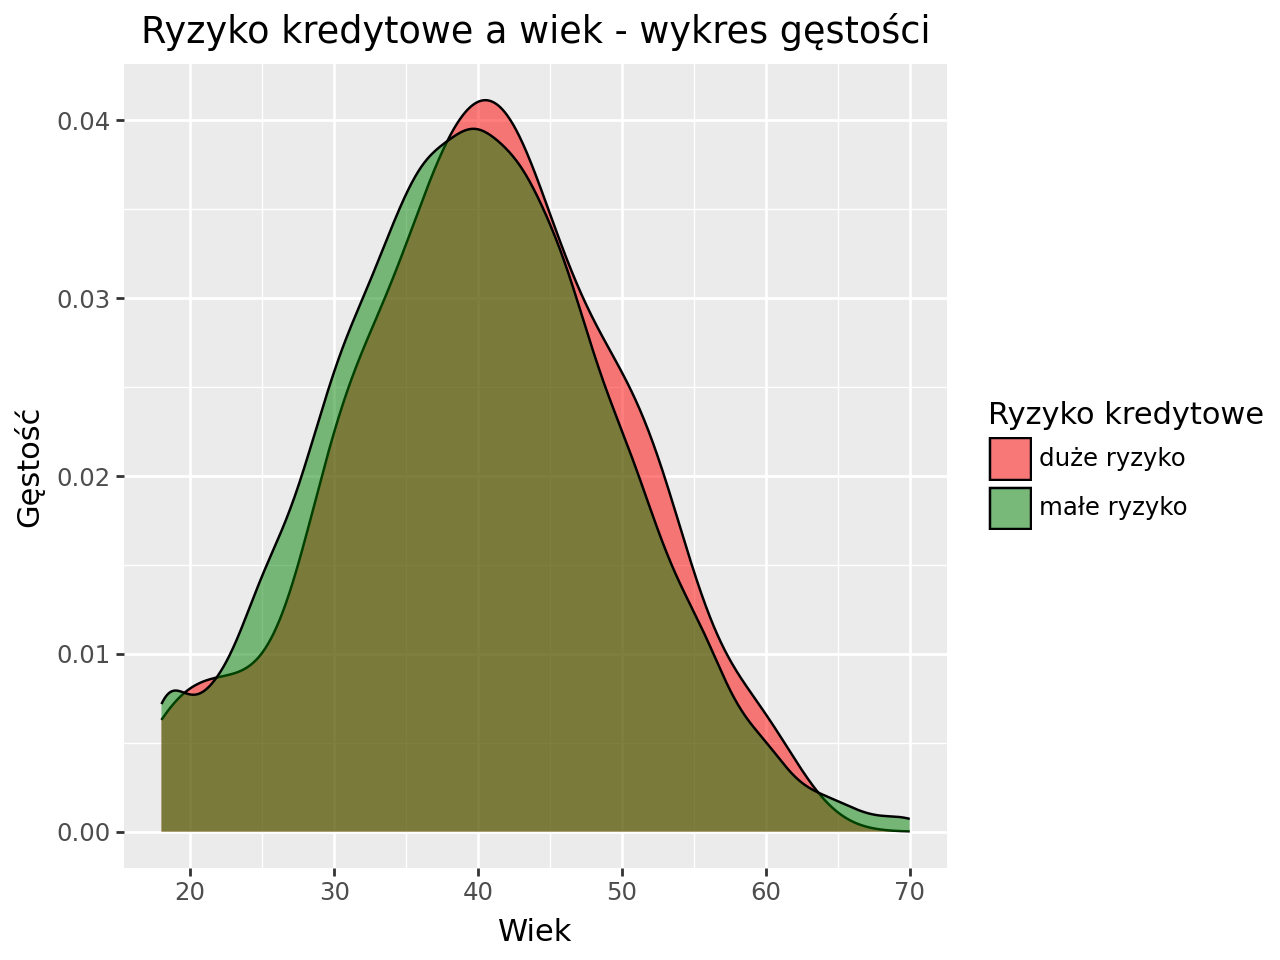

In [50]:
#Tworeznie i wyświetlanie wykresu
plot2 = (
    ggplot(provisional_data, aes(x='age', fill='credit_risk')) +
    geom_density(alpha=0.5, color='black') +
   scale_fill_manual(name="Ryzyko kredytowe", values={'małe ryzyko': 'green', 'duże ryzyko': 'red'}) +  # Zachowujemy kolory, ale zmieniamy tytuł
    labs(title="Ryzyko kredytowe a wiek - wykres gęstości", x="Wiek", y="Gęstość")
)

# Wyświetl wykres
plot2

Jak widać na wykresie osoby do około 38 roku życia mają mniejsze ryzyko na nie spłacenie kredytu. Sytuacja ta zmienia się po ukończeniu tego wieku, wtedy wiek zaczyna działać na niekorzyść potencjalnego kredytobiorcy.

Na wykresie widać także, że nie ma większego znaczenia, jeśli chodzi o ryzyko kredytowe czy dana osoba ma 30 czy 35 lat (działa to w takim samym stopniu na korzyść). Analogicznie nie ma większej różnicy między 40 , 50, a 60 rokiem życia (wiek działa w każdym z tych przypadków tak samo na niekorzyść)

Możemy zobaczyć także jaki wiek najczęściej występuje w naszych danych. Jak widać jest to wiek około 40 lat.

##### Czy zatem wartość posiadanych aktywów ma duży wpływ na ryzyko kredytowe?

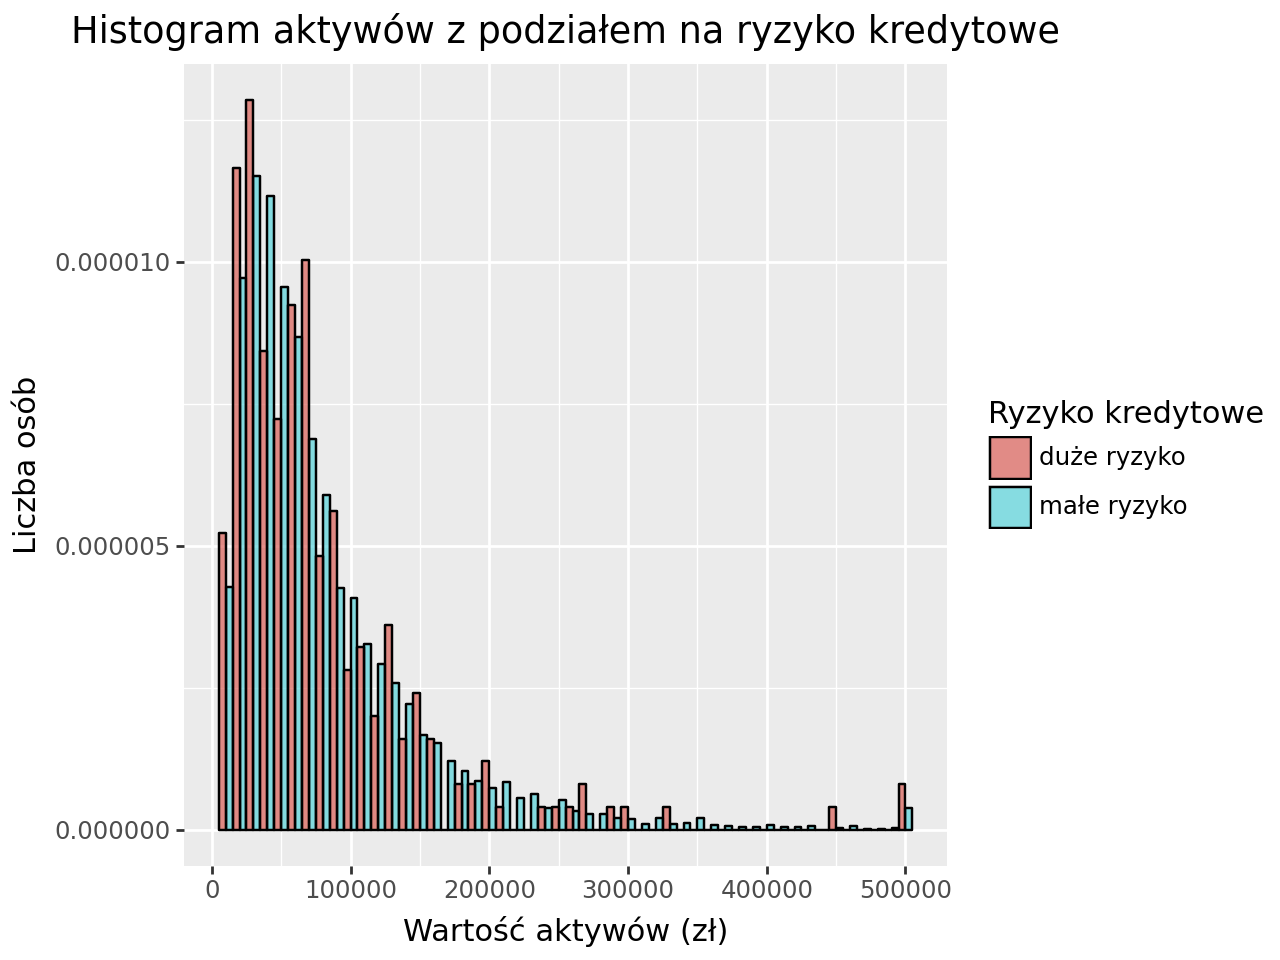

In [51]:
#Tworzenie i wyświetlanie wykresów
from plotnine import ggplot, aes, geom_histogram, labs, theme, element_text
import pandas as pd

plot3 = (
    ggplot(provisional_data, aes(x='assets_value', fill='factor(credit_risk)')) + 
    geom_histogram(aes(y='..density..'), binwidth=10000, color='black', alpha=0.7, position='dodge') +  # Normalizacja gęstości
    labs(
        title="Histogram aktywów z podziałem na ryzyko kredytowe",
        x="Wartość aktywów (zł)",
        y="Liczba osób",
        fill="Ryzyko kredytowe"  # Nazwa legendy
    ) +
    theme(plot_title=element_text(hjust=0.5))  # Tytuł na środku
)

# Wyświetlenie wykresu
plot3


Jak widać na powyższym wykresie posiadanie aktywów "niczego nie gwarantuje". Nawet osoby posiadające aktywa powyżej 400 tysięcy są narażone na duże ryzyko kredytowe.

Wniosek, więc jaki z powyższego wykresu możemy wynieść jest następujący: Nie istnieje zbyt duża korelacja między wartościami aktywów, a ryzykiem kredytowym.

#### Zmienne kategoryczne

##### Wykształcenie,  wielkość zamieszkałego miasta

In [52]:
#Tworzenie wykresów

provisional_data['education'] = provisional_data['education'].replace({
    0: 'podstawowe',
    1: 'średnie',
    2: 'wyższe'
})

# Grupowanie danych i obliczenie proporcji
normalized_data = (
    provisional_data.groupby(['credit_risk', 'education'])
    .size()
    .reset_index(name='count')
)

# Dodanie kolumny z proporcjami
normalized_data['proportion'] = normalized_data.groupby('credit_risk')['count'].transform(lambda x: x / x.sum())

plot4 = (
    ggplot(normalized_data, aes(x='education', y='proportion', fill='factor(credit_risk)')) +
    geom_col(position='dodge') +  #wykres kolumnowy z proporcjami
    labs(
        title="Ryzyko kredytowe, a wykształcenie",
        x="Poziom wykształcenia",
        y="Proporcja",
        fill="Ryzyko kredytowe"
    )
)


# Grupowanie danych i obliczenie proporcji
normalized_data = (
    provisional_data_basic.groupby(['credit_risk', 'city'])
    .size()
    .reset_index(name='count')
)

# Dodanie kolumny z proporcjami
normalized_data['proportion'] = normalized_data.groupby('credit_risk')['count'].transform(lambda x: x / x.sum())

plot9 = (
    ggplot(normalized_data, aes(x='city', y='proportion', fill='factor(credit_risk)')) +
    geom_col(position='dodge') +  #wykres kolumnowy z proporcjami
    labs(
        title="Ryzyko kredytowe, a wielkośc zamieszkałego miasta",
        x="Wielkość miasta",
        y="Proporcja",
        fill="Ryzyko kredytowe"
    )
)





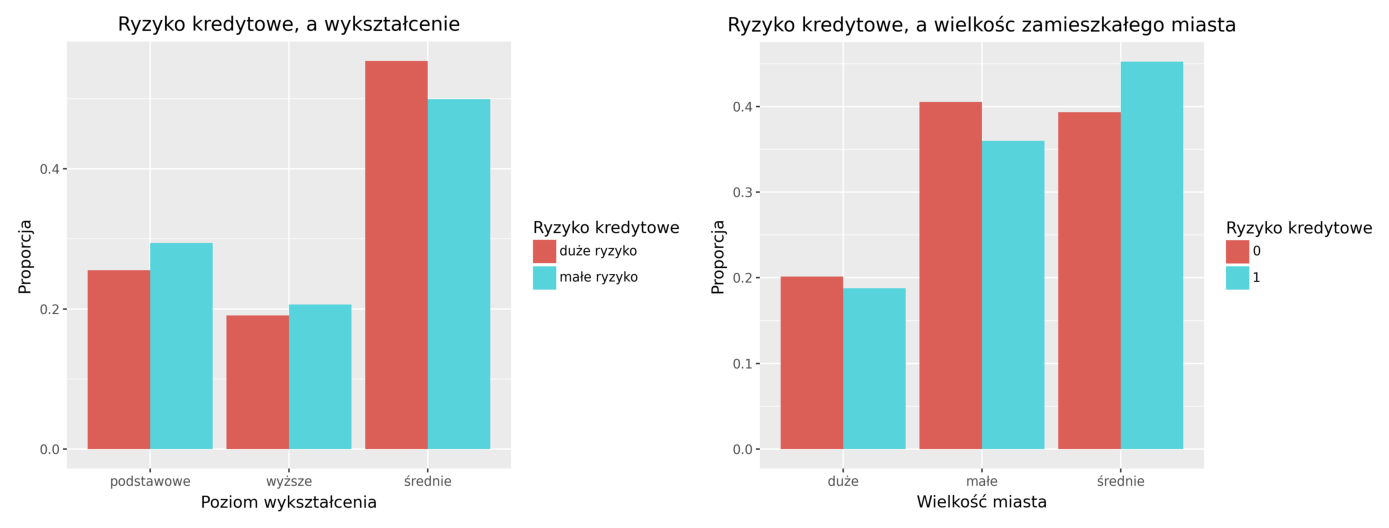

In [53]:
#Wyświetlanie wykresów

import matplotlib.pyplot as plt
from matplotlib.image import imread

# Zapis wykresów jako obrazy
plot4.save("plot4.png", dpi=300, verbose=False)
plot9.save("plot9.png", dpi=300, verbose=False)

# Tworzenie siatki subplotów 1x2 (1 wiersz, 2 kolumny)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Wczytanie obrazów GGPlot
images = [
    ("plot4.png", axs[0], ""),
    ("plot9.png", axs[1], "")
]

# Wyświetlanie obrazów w subplotach
for img_path, ax, title in images:
    img = imread(img_path)
    ax.imshow(img)
    ax.axis('off')  # Ukrycie osi
    ax.set_title(title, fontsize=12)

# Dostosowanie układu
plt.tight_layout()
plt.show()


###### Wykształcenie

Jak można zobaczyć wykształcenie podstawowe, oraz wyższe w naszych danych daje większą szanse na małe ryzyko kredytowe niż wykształcenie średnie.

Ciekawą obserwacją jaką na powyższym wykresie można zauważyć jest fakt, że w naszej bazie więcej osób posiada wykształcenie podstawowe niż wyższe.

###### Wielkość zamieszkałego miasta

Jeśli chodzi o miasto zamieszkania widać, że osoby zamieszkujące średnie miasta mają zwiększone ryzyko kredytowe, podczas gdy w małych miastach szansa na duże ryzyko kredytowe jest mniejsza niż na wyższe.

Można również zauważyć, że w naszych danych zdecydowanie częściej ludzie zamieszkują małe oraz średnie miasta, a nie duże.

##### Historia kredytów, opóźnienie w płatnościach, typ zatrudnienia, posiadanie nieruchomości.

In [54]:
#Tworzenie wykresów


# Grupowanie danych i liczenie proporcji
normalized_data1 = (
    provisional_data_basic.groupby(['credit_risk', 'credit_history'])
    .size()
    .reset_index(name='count')
)

# Dodanie kolumny z proporcjami w grupach credit_risk
normalized_data1['proportion'] = normalized_data1.groupby('credit_risk')['count'].transform(lambda x: x / x.sum())

# Tworzenie wykresu
plot5 = (
    ggplot(normalized_data1, aes(x='credit_history', y='proportion', fill='factor(credit_risk)')) +
    geom_col(position='dodge') +  # wykres kolumnowy z proporcjami
    labs(
        title="Ryzyko kredytowe, a historia kredytów",
        x="Historia kredytowa",
        y="Proporcja",
        fill="Ryzyko kredytowe"
    )
)


provisional_data['overdue_payments'] = provisional_data['overdue_payments'].replace({
    False: 'brak_opóżnień',
    True: 'opóźnienia'
})



# Grupowanie danych i liczenie proporcji
normalized_data2 = (
    provisional_data.groupby(['credit_risk', 'overdue_payments'])
    .size()
    .reset_index(name='count')
)

# Dodanie kolumny z proporcjami w grupach credit_risk
normalized_data2['proportion'] = normalized_data2.groupby('credit_risk')['count'].transform(lambda x: x / x.sum())

# Tworzenie wykresu
plot6 = (
    ggplot(normalized_data2, aes(x='overdue_payments', y='proportion', fill='factor(credit_risk)')) +
    geom_col(position='dodge') +  # wykres kolumnowy z proporcjami
    labs(
        title="Ryzyko kredytowe, a opóźnione płatności",
        x="Opóźnienia w płatnościach",
        y="Proporcja",
        fill="Ryzyko kredytowe"
    )
)


# Grupowanie danych i liczenie proporcji
normalized_data3 = (
    provisional_data_basic.groupby(['credit_risk', 'employment_type'])
    .size()
    .reset_index(name='count')
)

# Dodanie kolumny z proporcjami w grupach credit_risk
normalized_data3['proportion'] = normalized_data3.groupby('credit_risk')['count'].transform(lambda x: x / x.sum())

# Tworzenie wykresu
plot7 = (
    ggplot(normalized_data3, aes(x='employment_type', y='proportion', fill='factor(credit_risk)')) +
    geom_col(position='dodge') +  # wykres kolumnowy z proporcjami
    labs(
        title="Ryzko kredytowe, a typ zatrudnienia",
        x="Typ zatrudnienia",
        y="Proporcja",
        fill="Ryzyko kredytowe"
    )
)


# Grupowanie danych i liczenie proporcji
normalized_data4 = (
    provisional_data_basic.groupby(['credit_risk', 'owns_property'])
    .size()
    .reset_index(name='count')
)

# Dodanie kolumny z proporcjami w grupach credit_risk
normalized_data4['proportion'] = normalized_data4.groupby('credit_risk')['count'].transform(lambda x: x / x.sum())

# Tworzenie wykresu
plot8 = (
    ggplot(normalized_data4, aes(x='owns_property', y='proportion', fill='factor(credit_risk)')) +
    geom_col(position='dodge') +  # wykres kolumnowy z proporcjami
    labs(
        title="     Ryzko kredytowe, a posiadanie nieruchomości",
        x="Czy posiada nieruchomość?",
        y="Proporcja",
        fill="Ryzyko kredytowe"
    )
)



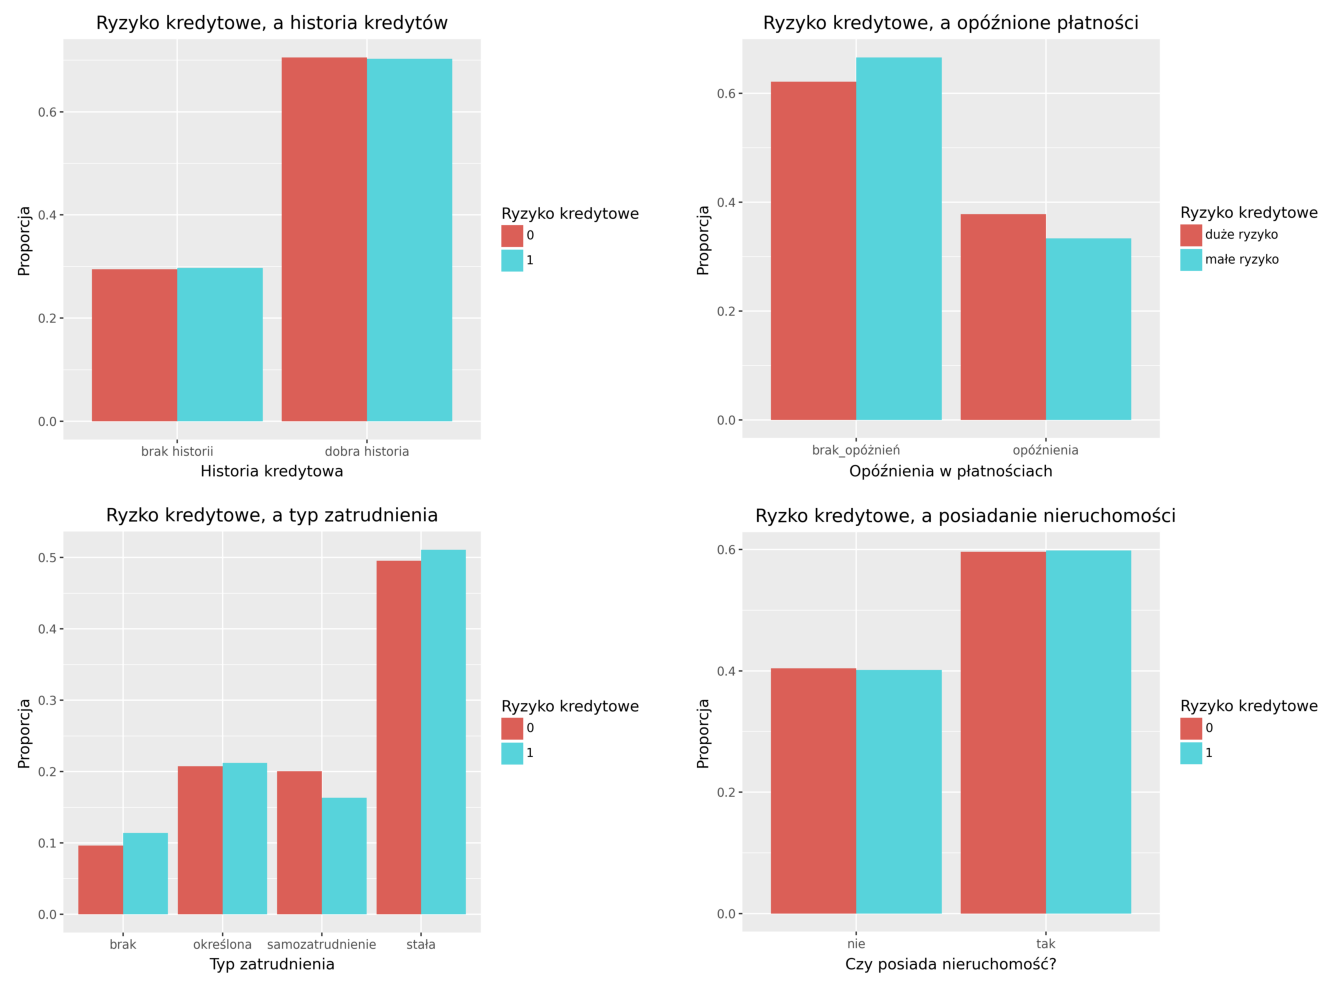

In [55]:
#Wyświetlanie wykresów

# Zapis wykresów jako obrazy
plot5.save("plot5.png", dpi=300, verbose=False)
plot6.save("plot6.png", dpi=300, verbose=False)
plot7.save("plot7.png", dpi=300, verbose=False)
plot8.save("plot8.png", dpi=300, verbose=False)

# Tworzenie siatki subplotów 2x2
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Wczytanie obrazów GGPlot
images = [
    ("plot5.png", axs[0, 0], ""),
    ("plot6.png", axs[0, 1], ""),
    ("plot7.png", axs[1, 0], ""),
    ("plot8.png", axs[1, 1], "")
]

# Wyświetlanie obrazów w subplotach
for img_path, ax, title in images:
    img = imread(img_path)
    ax.imshow(img)
    ax.axis('off')  # Ukrycie osi
    ax.set_title(title, fontsize=12)

# Dostosowanie układu
plt.tight_layout()
plt.show()


###### Historia kredytów

Widać także, że posiadanie dobrej historii kredytowej naprawdę niewiele zwiększa szanse na małe ryzyko kredytowe w porównaniu do osób które tej historii nie mają.

Można zaobserwować, że w naszych danych nie wsytępuje ani jedna obserwacja ze złą historią kredytową. 

Zdecydowanie więcej obserwacji posiada dobrą historie kredytową, niż jej brak.


###### Opóżnienia w płatnościach

Widać istniejącą korelacje, obserwacje z opóźnieniem w płatnościacj mają zwiększone ryzyko kredytowe.

Opóźnienia w płatnościach ma mniej niż 40% obserwacji.

###### Typ zatrudnienia

Brak zatrudnienia najbardziej zmniejsza szanse na zakwalifikowanie obserwacji jako obserwacji z małym ryzykiem kredytowym. Stałe zatrudnienie również działa na niekorzyść danej obserwacji. Mocno na korzyść działa samozatrudnienie.

Około 50% obserwacji posiada stałą prace, a najmniej popularne jest brak zatrudnienia.

###### Posiadanie nieruchomości

Jak widać posiadanie nieruchomości nie zwiększa znacząco szansy na małe ryzyko kredytowe.

Około 60% obserwacji posiada nieruchomość.

# 3. Zaleznosci miedzy zmiennymi

### Zmienne liczbowe

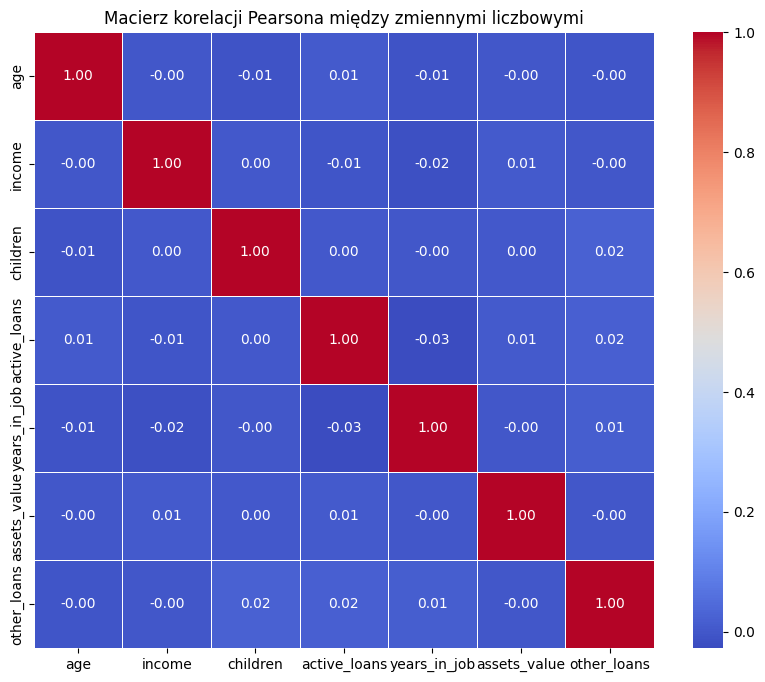

In [56]:
#Tworzenie i wyświetlanie macierzy
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data_numeric.corr() #Oblicza korelacje Pearsona między wszystkimi zmiennymi liczbowymi.

# Wyświetlenie macierzy korelacji jako wykresu heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Macierz korelacji Pearsona między zmiennymi liczbowymi')
plt.show()


W korelacji Pearsona wartości korelacji wahają się od -1 do 1. Wartości bliskie 1 oznaczają silną korelację pozytywną, wartości bliskie -1 oznaczają silną korelację negatywną, a wartości bliskie 0 oznaczają brak korelacji.

Na podstawie macierzy korelacji Pearsona widać, że zmienne liczbowe nie są ze sobą istotnie skorelowane.

### Zmienne kategoryczne

In [57]:
# Tworzymy pustą ramkę danych do przechowywania wyników
p_values_table = pd.DataFrame(index=data_basic_category.columns, columns=data_basic_category.columns)

# Iteracja po parach zmiennych kategorycznych
for col1 in data_basic_category.columns:
    for col2 in data_basic_category.columns:
        if col1 != col2:  # Ignorujemy porównanie tej samej zmiennej
            # Tworzymy macierz kontyngencji
            contingency_table = pd.crosstab(data_basic_category[col1], data_basic_category[col2])
            
            # Przeprowadzamy test chi-kwadrat
            _, p, _, _ = stats.chi2_contingency(contingency_table)
            
            # Zapisujemy wartość p do tabeli
            p_values_table.loc[col1, col2] = p
        else:
            # Na przekątnej wpisujemy NaN, bo nie ma sensu testować zmiennej z samą sobą
            p_values_table.loc[col1, col2] = None

# Wyświetlamy tabelę z wartościami p
print("Tabela wartości p dla testu chi-kwadrat:")
print(p_values_table)

Tabela wartości p dla testu chi-kwadrat:
                 credit_history overdue_payments employment_type  \
credit_history             None         0.442519        0.805528   
overdue_payments       0.442519             None        0.657547   
employment_type        0.805528         0.657547            None   
owns_property          0.075578         0.077606        0.392405   
education              0.553004         0.862194        0.843523   
city                    0.21048         0.360595        0.588482   
marital_status         0.212989         0.977332        0.197273   

                 owns_property education      city marital_status  
credit_history        0.075578  0.553004   0.21048       0.212989  
overdue_payments      0.077606  0.862194  0.360595       0.977332  
employment_type       0.392405  0.843523  0.588482       0.197273  
owns_property             None  0.476398  0.748159       0.085492  
education             0.476398      None  0.006518        0.38179  
city  

Na podstawie powyższych 2 tabel wyciągamy wnioseki, wszystkie zmienne kategoryczne są niezależne, z wyjątkiem zależności między wielkością miasta a poziomem wykształcenia (Gdyż tylko w tej wartości nasze p jest mniejsze od 0.05).

# 4. Uzupelnianie danych

Jeśli chcielibyśmy usunąć wiersze z brakującymi danymi byłoby to na pewno ponad 27% naszych danych, gdyż w samej kolumnie "overdue_payments" ponad 27% wartości jest brakujących. Musimy, więc te dane uzupełnić jest ich zdecydowanie za dużo żeby myśleć o usuwaniu brakujących wartości.

### zmienne liczbowe

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   age                                       10000 non-null  int64  
 1   income                                    8000 non-null   float64
 2   children                                  10000 non-null  int64  
 3   credit_history                            8000 non-null   object 
 4   overdue_payments                          7260 non-null   object 
 5   active_loans                              10000 non-null  int64  
 6   years_in_job                              10000 non-null  int64  
 7   owns_property                             8000 non-null   object 
 8   assets_value                              8000 non-null   float64
 9   other_loans                               10000 non-null  int64  
 10  education                          

Jedynymi kolumnami z wartościami liczbowymi posiadającymi braki są kolumny: "overdue_payments" oraz "assets_value".

Jako, że udowodniliśmy już niezależność zmiennych liczbowych między sobą, oraz nie mamy dużej ilości wartości odstających dane te uzupełnijmy średnią.

In [59]:
# Obliczanie średniej wartości w kolumnie 'income', ignorując wartości brakujące
mean_income = data['income'].mean()

# Uzupełnianie brakujących wartości średnią
data['income'] = data['income'].fillna(mean_income)

# Obliczanie średniej wartości w kolumnie 'assets_value', ignorując wartości brakujące
mean_assets_value = data['assets_value'].mean()

# Uzupełnianie brakujących wartości średnią
data['assets_value'] = data['assets_value'].fillna(mean_assets_value)

print(mean_income)
print(mean_assets_value)

23598.62125
80349.42025


Nasza średnia z wartości przychodów wynosi 23598.62125, a średnia wartość posiadanych aktywów 80349.42024(9) i to tymi wartościami uzupełniamy puste braki daych.

### Zmienne kategoryczne

W zmiennych kategorycznych braki występują w kolumnach "credit_history", "overdue_payments", "owns_property".

Jako, że udowodniliśmy już niezależność wartości kategorycznych między sobą. Braki uzupełnimy losowo na podstawie proporcji występowania każdej kategorii w zmiennej.

In [60]:
#Ziarno
np.random.seed(2115)
# Funkcja do imputacji na podstawie rozkładu
def fill_missing_with_distribution(column):
    # Rozkład kategorii (proporcje)
    distribution = column.value_counts(normalize=True)
    # Losowe przypisanie na podstawie rozkładu
    return column.apply(lambda x: x if pd.notna(x) else np.random.choice(distribution.index, p=distribution.values))

# Uzupełnienie braków
data['credit_history'] = fill_missing_with_distribution(data['credit_history'])
data['overdue_payments'] = fill_missing_with_distribution(data['overdue_payments'])
data['owns_property'] = fill_missing_with_distribution(data['owns_property'])


In [61]:
# Sprawdzamy, czy zbiór danych zawiera braki
data.isnull().sum()

age                                         0
income                                      0
children                                    0
credit_history                              0
overdue_payments                            0
active_loans                                0
years_in_job                                0
owns_property                               0
assets_value                                0
other_loans                                 0
education                                   0
credit_risk                                 0
employment_type_brak                        0
employment_type_określona                   0
employment_type_samozatrudnienie            0
employment_type_stała                       0
city_duże                                   0
city_małe                                   0
city_średnie                                0
marital_status_kawaler/panna                0
marital_status_rozwiedziony/rozwiedziona    0
marital_status_żonaty/zamężna     

Jak widać uzupełniliśmy wszystkie brakujące braki danych.

# 5. Tworzenie i trenowanie modeli

In [62]:
# X - zmienne niezależne (predyktory), y - zmienna zależna (wynikowa)
X = data.drop('credit_risk', axis=1)
y = data['credit_risk']

# Dzielimy zbiór na uczący i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Drzewo decyzyjne

In [63]:
#Model Drzewa - tworzymy
dt_model = DecisionTreeClassifier()
#Trenujemy
dt_model.fit(X_train, y_train)
#Sprawdzamy
y_pred_dt = dt_model.predict(X_test)

### Las losowy

In [64]:
#Model lasu losowego - tworzymy
rf_model = RandomForestClassifier()
#Trenujemy
rf_model.fit(X_train, y_train)
#Sprawdzamy
y_pred_rf = rf_model.predict(X_test)

### Maszyna wektorów nośnych SVM

In [65]:
#Model wektoró nośnych SVM - tworzymy
svm_model = SVC()
#Trenujemy
svm_model.fit(X_train, y_train)
#Sprawdzamy
y_pred_svm = svm_model.predict(X_test)

### Naiwny klasyfikator Bayesa

In [66]:
#Model klasyfikatora Bayesa - tworzymy
nb_model = GaussianNB()
#Trenujemy
nb_model.fit(X_train, y_train)
#Sprawdzamy
y_pred_nb = nb_model.predict(X_test)

### XGBoost

In [67]:
#Model XgBoost - tworzymy
xgbc_model = XGBClassifier()
#Trenujemy
xgbc_model.fit(X_train, y_train)
#Sprawdzamy
y_pred_xgbc = xgbc_model.predict(X_test)

# 6. Sprawdzanie jakosci modeli

In [68]:
# Funkcja, która jako argumenty przyjmuje rzeczywiste wartości zbioru testowego oraz wartości przewidziane przez model

def cl_metrics(y_true, y_pred):
  accuracy = round(accuracy_score(y_true, y_pred),2)
  recall = round(recall_score(y_true, y_pred),2)
  specificity = round(specificity_score(y_true, y_pred),2)
  return accuracy, recall, specificity

# round(x, 2) - zaokrąglamy x do 2 miejsc po przecinku

# Tworzymy słownik, w którym kluczem jest nazwa modelu, a wartością - wartości przewidziane przez model
cl_models = {'DT': y_pred_dt,
             'RF': y_pred_rf,
             'SVM': y_pred_svm,
             'NB': y_pred_nb,
             'XGB': y_pred_xgbc}
# Tworzymy pustą listę, w której zapiszemy wyniki
results = []

# Za pomocą pętli, obliczamy metryki dla wszystkich modeli (elementów słownika) przy użyciu wcześniej zdefiniowanej funkcji, a następnie dopisujemy wyniki do listy

for model, y_pred in cl_models.items():
  accuracy, recall, specificity = cl_metrics(y_test, y_pred)
  results.append({
    'Model': model,
    'Accuracy': accuracy,
    'Recall': recall,
    'Specificity': specificity
  })

# Wyświetlamy listę jako ramkę danych
pd.DataFrame(results)

,Model,Accuracy,Recall,Specificity
0,DT,0.96,0.53,0.98
1,RF,0.98,0.48,1.00
2,SVM,0.96,0.00,1.00
3,NB,0.96,0.00,1.00
4,XGB,0.98,0.46,1.00


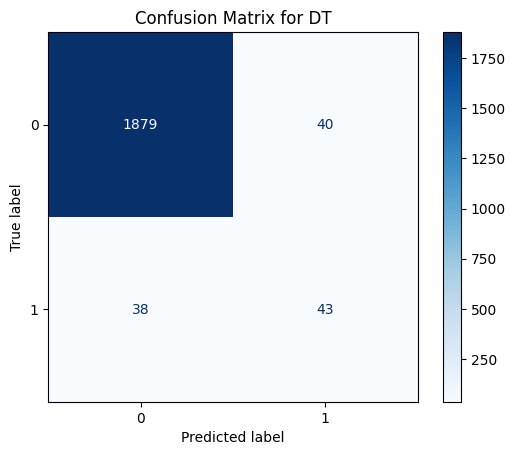

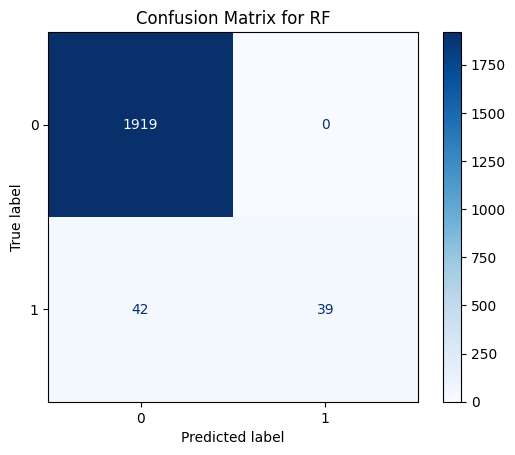

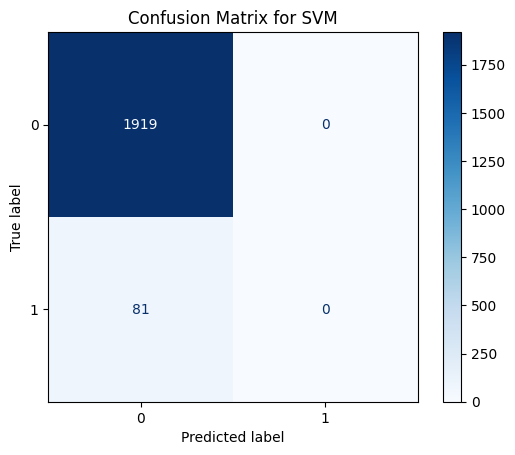

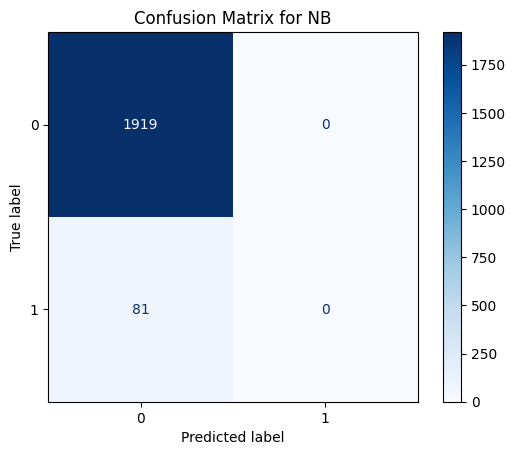

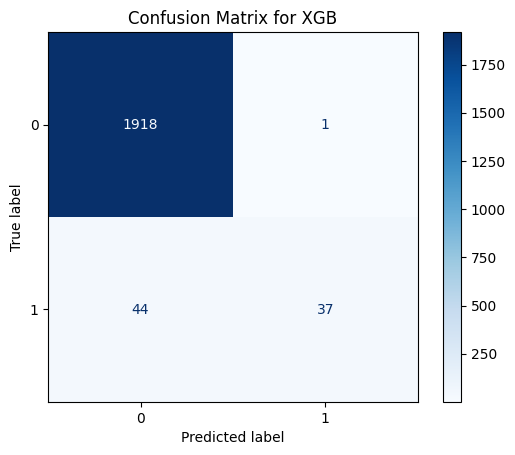

In [69]:
# Funkcja jako argumenty przyjmuje wartości rzeczywiste, wartości przewidywane przez model oraz tytuł

def plot_confmat(y_test, y_pred, title):

  # Tworzymy tablicę pomyłek
  cm = confusion_matrix(y_test, y_pred)
  
  # Tworzymy macierz i ją wyświetlamy
  cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  cm_disp.plot(cmap = plt.cm.Blues)
  plt.title(title)
  plt.show()

# Za pomocą pętli wywołujemy funkcję dla każdego z pięciu modeli
for model, y_pred in cl_models.items():
  plot_confmat(y_test, y_pred, title=f'Confusion Matrix for {model}')

Jak możemy zobaczyć w naszym przypadku najlepiej sprawdził się model lasu losowego :)